# Visualizing The Gender Gap In College Degrees

In this project we will work on visualizing the gender gap across college degrees. The data are released by the Department of Education Statistics and contains 17 categories of degrees with the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set was cleaned by Randal Olson from University of Pennsylvania: http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv.

## Reading the data

In [1]:
#Let's start with importing the libraries and reading the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

women_degrees = pd.read_csv(r"Data\percent-bachelors-degrees-women-usa.csv")
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Comparing the gender gap across STEM degrees

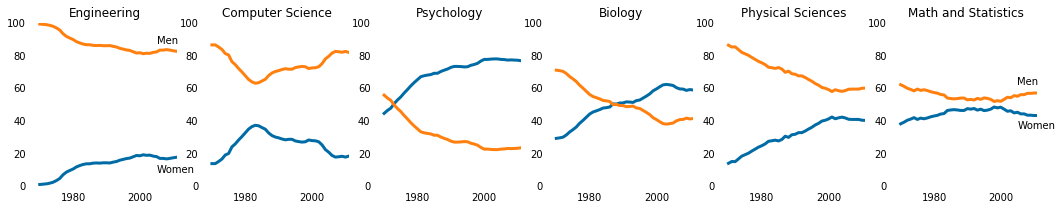

In [28]:
#Let's start with creating the list of STEM degrees.
stem_degrees = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

#We will be using colour palette created by Tableau "Color Blind 10", which is friendly for people with colour blindness.
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

#Now we are ready to create our plot. It will be one row, so we sould set a wide size.
fig = plt.figure(figsize=(18,3))

#We will have 6 plots for each column (our plot area will be one row by 6 columns)
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    
    #We will plot two lines on one chart (one for women and one for men, so we can easly see the gap).
    ax.plot(women_degrees["Year"], women_degrees[stem_degrees[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[stem_degrees[sp]], c=cb_orange, label='Men', linewidth=3)
    
    #Let's set range for x and y axis
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #Let's set a title as the column name
    ax.set_title(stem_degrees[sp])
    
    #Let's remove all ticks and spine, so the chart will be more clear
    ax.tick_params(bottom='off', left='off', top='off', right='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    
    #As a last step let's set a legend on the first and last chart
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2005, 8, "Women")
    elif sp == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
plt.show()

## Compring the gender gap across all degrees

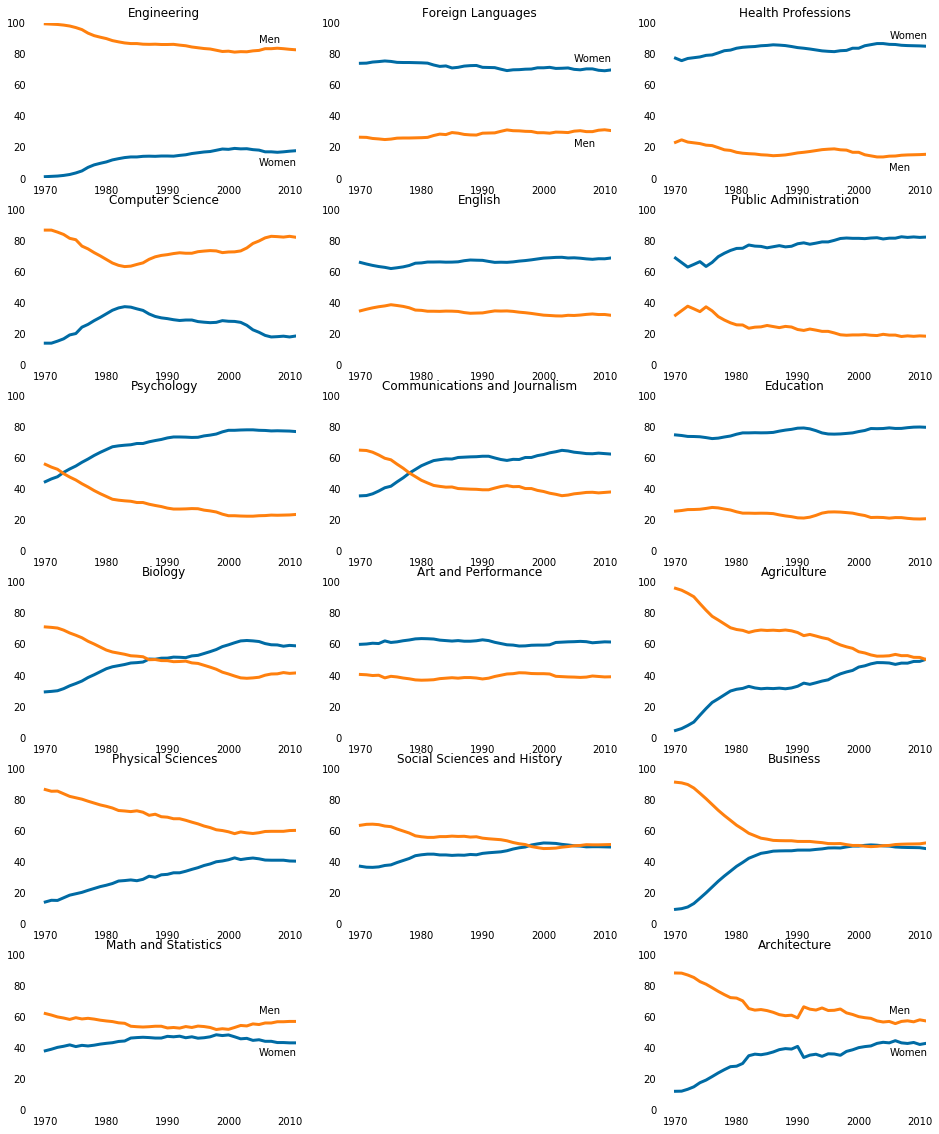

In [41]:
#Now we will create plots as before, but for all degrees. 
#We will devide them into 3 groups, each group will be plotted in different column.
stem_degrees = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_degrees = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_degrees = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(16,20))

#Let's start with the stem_degrees list.
for sp in range(0,18,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[stem_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_degrees[degree_index])
    ax.tick_params(bottom='off', left='off', top='off', right='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 87, "Men")
        ax.text(2005, 8, "Women")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
        
#As a second column we will plot charts from lib_arts_degrees.
for sp in range(0,15,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+2)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[lib_arts_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_degrees[degree_index])
    ax.tick_params(bottom='off', left='off', top='off', right='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 75, "Women")
        ax.text(2005, 20, "Men")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")

#As a thirs column we will plot charts from other_degrees.
for sp in range(0,18,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+3)
    ax.plot(women_degrees["Year"], women_degrees[other_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[other_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(other_degrees[degree_index])
    ax.tick_params(bottom='off', left='off', top='off', right='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 90, "Women")
        ax.text(2005, 5, "Men")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
plt.show()

## Improving the charts

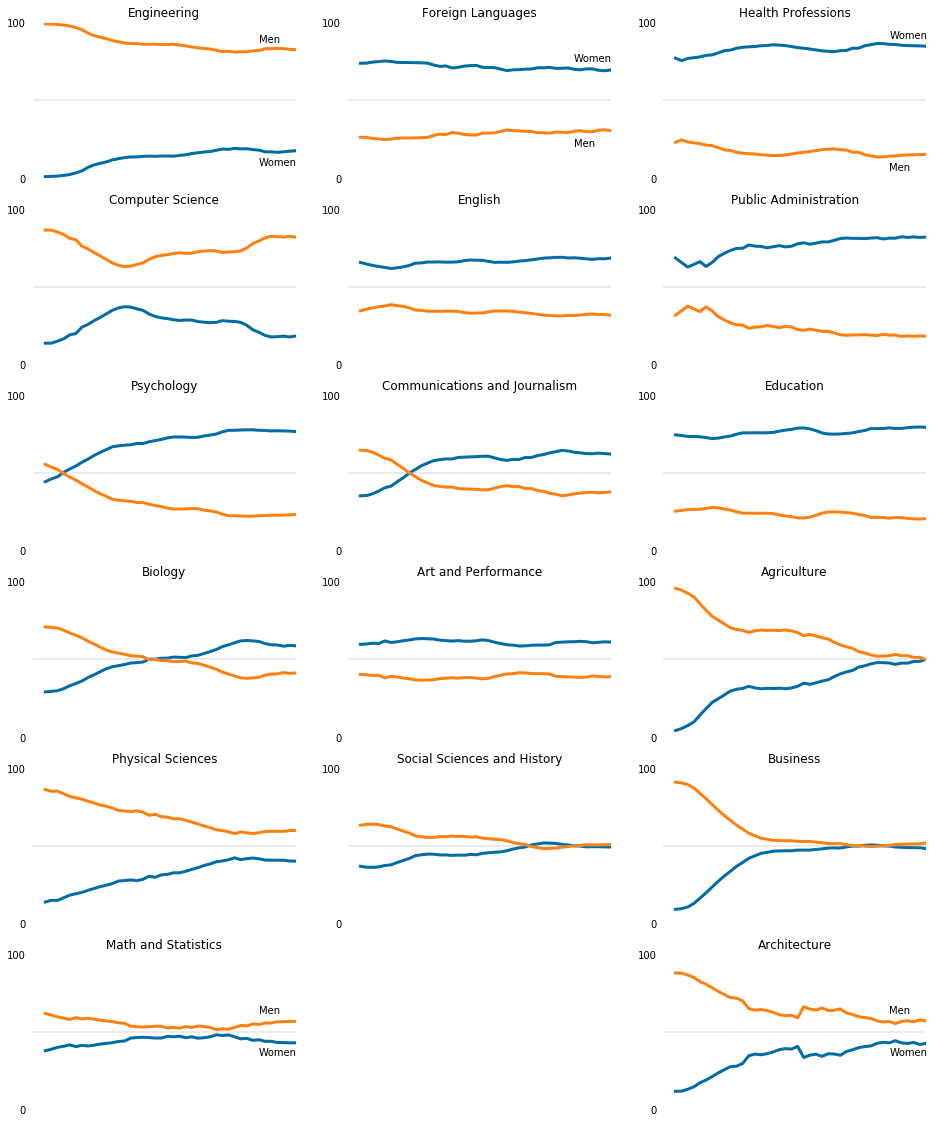

In [42]:
#To improve a visibility of our charts we will do the following things: 
#hide x-axis labels, set y-axis labels to just 0 and 100 and add horizontal line.

fig = plt.figure(figsize=(16,20))

#Plotting the charts from the stem_degrees list.
for sp in range(0,18,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[stem_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #We will set y-axis labels to just 0 and 100
    ax.set_yticks([0,100])
    ax.set_title(stem_degrees[degree_index])
    
    #We will remove x-axis labels by setting 'labelbottom' to 'off'.
    ax.tick_params(bottom='off', left='off', top='off', right='off', labelbottom='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 87, "Men")
        ax.text(2005, 8, "Women")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
    
    #Let's ad a horizontal line, which will be at level of 50 and will have gray colout from Tableau "Color Blind 10".
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
#Plotting the charts from lib_arts_degrees.
for sp in range(0,15,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+2)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[lib_arts_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #We will set y-axis labels to just 0 and 100
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_degrees[degree_index])
    
    #We will remove x-axis labels by setting 'labelbottom' to 'off'.
    ax.tick_params(bottom='off', left='off', top='off', right='off', labelbottom='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 75, "Women")
        ax.text(2005, 20, "Men")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
    
    #Let's ad a horizontal line, which will be at level of 50 and will have gray colout from Tableau "Color Blind 10".
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

#Plotting the charts from other_degrees.
for sp in range(0,18,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+3)
    ax.plot(women_degrees["Year"], women_degrees[other_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[other_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #We will set y-axis labels to just 0 and 100
    ax.set_yticks([0,100])
    ax.set_title(other_degrees[degree_index])
    
    #We will remove x-axis labels by setting 'labelbottom' to 'off'.
    ax.tick_params(bottom='off', left='off', top='off', right='off', labelbottom='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 90, "Women")
        ax.text(2005, 5, "Men")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
        
    #Let's ad a horizontal line, which will be at level of 50 and will have gray colout from Tableau "Color Blind 10".
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
plt.show()

## Exporting to a file

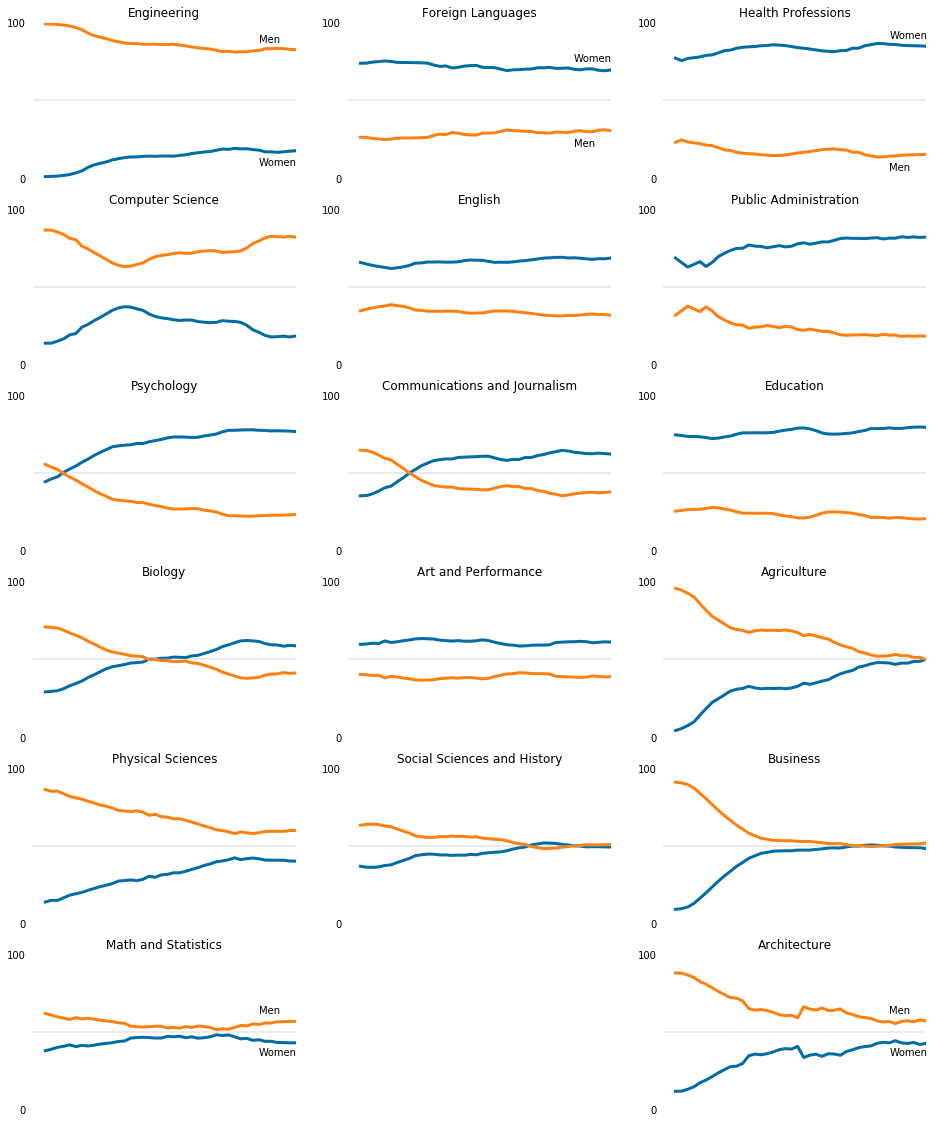

In [43]:
#We are going to export our charts to "gender_degrees.png".
#To improve a visibility of our charts we will do the following things: 
#hide x-axis labels, set y-axis labels to just 0 and 100 and add horizontal line.

fig = plt.figure(figsize=(16,20))

#Plotting the charts from the stem_degrees list.
for sp in range(0,18,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[stem_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #We will set y-axis labels to just 0 and 100
    ax.set_yticks([0,100])
    ax.set_title(stem_degrees[degree_index])
    
    #We will remove x-axis labels by setting 'labelbottom' to 'off'.
    ax.tick_params(bottom='off', left='off', top='off', right='off', labelbottom='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 87, "Men")
        ax.text(2005, 8, "Women")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
    
    #Let's ad a horizontal line, which will be at level of 50 and will have gray colout from Tableau "Color Blind 10".
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
#Plotting the charts from lib_arts_degrees.
for sp in range(0,15,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+2)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[lib_arts_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #We will set y-axis labels to just 0 and 100
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_degrees[degree_index])
    
    #We will remove x-axis labels by setting 'labelbottom' to 'off'.
    ax.tick_params(bottom='off', left='off', top='off', right='off', labelbottom='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 75, "Women")
        ax.text(2005, 20, "Men")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
    
    #Let's ad a horizontal line, which will be at level of 50 and will have gray colout from Tableau "Color Blind 10".
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

#Plotting the charts from other_degrees.
for sp in range(0,18,3):
    degree_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+3)
    ax.plot(women_degrees["Year"], women_degrees[other_degrees[degree_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees["Year"], 100-women_degrees[other_degrees[degree_index]], c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    #We will set y-axis labels to just 0 and 100
    ax.set_yticks([0,100])
    ax.set_title(other_degrees[degree_index])
    
    #We will remove x-axis labels by setting 'labelbottom' to 'off'.
    ax.tick_params(bottom='off', left='off', top='off', right='off', labelbottom='off')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if degree_index == 0:
        ax.text(2005, 90, "Women")
        ax.text(2005, 5, "Men")
    elif degree_index == 5:
        ax.text(2005, 62, "Men")
        ax.text(2005, 35, "Women")
        
    #Let's ad a horizontal line, which will be at level of 50 and will have gray colout from Tableau "Color Blind 10".
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
#Now we can export the charts to a file
fig.savefig("gender_degrees.png")

plt.show()